In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('2025_Drivers_preprocessed.csv')
df.head(10)

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067,26,0,23
1,6,3,Daniel Ricciardo,Red Bull Racing Renault,57.0,+1 lap,8.0,Flag of AustraliaAustralia,2015-03-15,90.000,6,0,31
2,7,27,Nico Hulkenberg,Force India Mercedes,57.0,+1 lap,6.0,Flag of AustraliaAustralia,2015-03-15,90.000,33,0,11
3,9,55,Carlos Sainz,STR Renault,57.0,+1 lap,2.0,Flag of AustraliaAustralia,2015-03-15,90.000,4,0,34
4,10,11,Sergio Perez,Force India Mercedes,57.0,+1 lap,1.0,Flag of AustraliaAustralia,2015-03-15,90.000,49,0,11
5,2,44,Lewis Hamilton,Mercedes,56.0,+8.569s,18.0,Flag of MalaysiaMalaysia,2015-03-29,8.569,26,20,23
6,5,77,Valtteri Bottas,Williams Mercedes,56.0,+70.409s,10.0,Flag of MalaysiaMalaysia,2015-03-29,70.409,51,20,40
7,7,33,Max Verstappen,STR Renault,56.0,+97.762s,6.0,Flag of MalaysiaMalaysia,2015-03-29,97.762,30,20,34
8,8,55,Carlos Sainz,STR Renault,55.0,+1 lap,4.0,Flag of MalaysiaMalaysia,2015-03-29,90.000,4,20,34
9,10,3,Daniel Ricciardo,Red Bull Racing Renault,55.0,+1 lap,1.0,Flag of MalaysiaMalaysia,2015-03-29,90.000,6,20,31


In [4]:
df.shape

(2668, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pos.            2668 non-null   int64  
 1   No.             2668 non-null   int64  
 2   Driver          2668 non-null   object 
 3   Team            2668 non-null   object 
 4   Laps            2668 non-null   float64
 5   Time / Retired  2668 non-null   object 
 6   Pts.            2668 non-null   float64
 7   Country         2668 non-null   object 
 8   Race Dates      2668 non-null   object 
 9   Time_seconds    2668 non-null   float64
 10  Driver_code     2668 non-null   int64  
 11  Country_code    2668 non-null   int64  
 12  Team_code       2668 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 271.1+ KB


In [6]:
df.columns

Index(['Pos.', 'No.', 'Driver', 'Team', 'Laps', 'Time / Retired', 'Pts.',
       'Country', 'Race Dates', 'Time_seconds', 'Driver_code', 'Country_code',
       'Team_code'],
      dtype='object')

In [8]:
# Suppose your position column is 'Pos.'
df['Pos_class'] = df['Pos.'].apply(lambda x: x if x <= 10 else 11)

In [9]:
df = df[['Pos.', 'No.', 'Laps', 'Pts.','Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class']]
df.head(10)

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,5514.067,26,0,23,1
1,6,3,57.0,8.0,90.000,6,0,31,6
2,7,27,57.0,6.0,90.000,33,0,11,7
3,9,55,57.0,2.0,90.000,4,0,34,9
4,10,11,57.0,1.0,90.000,49,0,11,10
5,2,44,56.0,18.0,8.569,26,20,23,2
6,5,77,56.0,10.0,70.409,51,20,40,5
7,7,33,56.0,6.0,97.762,30,20,34,7
8,8,55,55.0,4.0,90.000,4,20,34,8
9,10,3,55.0,1.0,90.000,6,20,31,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos.          2668 non-null   int64  
 1   No.           2668 non-null   int64  
 2   Laps          2668 non-null   float64
 3   Pts.          2668 non-null   float64
 4   Time_seconds  2668 non-null   float64
 5   Driver_code   2668 non-null   int64  
 6   Country_code  2668 non-null   int64  
 7   Team_code     2668 non-null   int64  
 8   Pos_class     2668 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 187.7 KB


In [11]:
df.isna().sum().sum()

0

In [12]:
df.duplicated().sum()

18

In [13]:
correlation = df.corr()
correlation

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
Pos.,1.000000,-0.110208,-0.038725,-0.888361,-0.394103,0.071933,0.019717,-0.145731,0.943495
No.,-0.110208,1.000000,0.017560,0.118641,0.009469,0.108296,0.001666,0.109323,-0.128542
Laps,-0.038725,0.017560,1.000000,0.038549,0.024468,0.000036,-0.034904,0.019755,-0.029242
Pts.,-0.888361,0.118641,0.038549,1.000000,0.637124,-0.022478,-0.005276,0.177535,-0.970774
Time_seconds,-0.394103,0.009469,0.024468,0.637124,1.000000,0.027731,0.003731,0.117812,-0.473024
Driver_code,0.071933,0.108296,0.000036,-0.022478,0.027731,1.000000,-0.013440,-0.048795,0.048023
Country_code,0.019717,0.001666,-0.034904,-0.005276,0.003731,-0.013440,1.000000,-0.016295,0.009152
Team_code,-0.145731,0.109323,0.019755,0.177535,0.117812,-0.048795,-0.016295,1.000000,-0.170309
Pos_class,0.943495,-0.128542,-0.029242,-0.970774,-0.473024,0.048023,0.009152,-0.170309,1.000000


<Axes: >

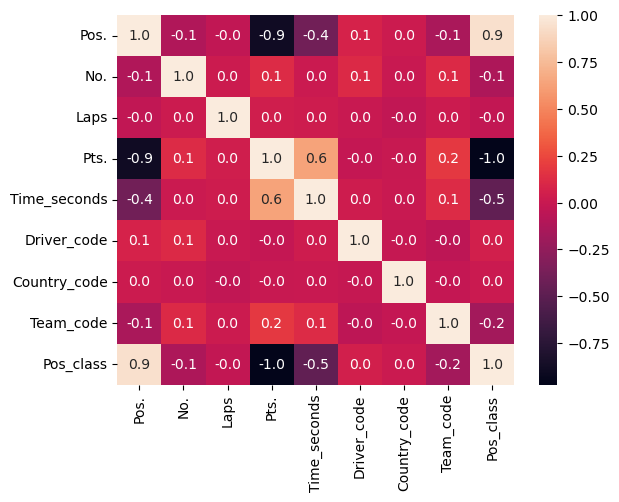

In [14]:
plt.figure()
sns.heatmap(correlation,fmt='.1f',annot=True)

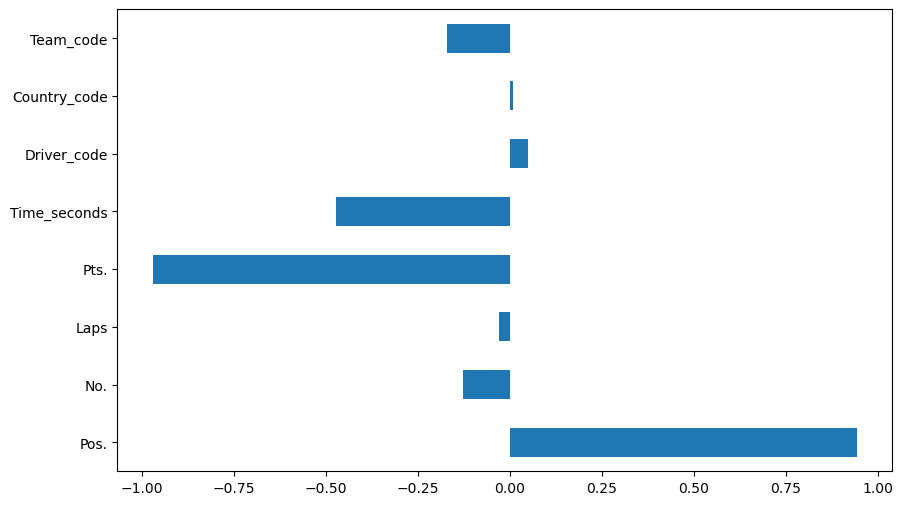

In [15]:
correlation_values = df.corr()['Pos_class'].drop('Pos_class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [16]:
df.shape

(2668, 9)

In [17]:
j = 0
for i in df.columns: 
    if ((correlation[i] <= 0).sum()) >= 4:
        j = j+1
        print(j,'.',i,(correlation[i] <= 0).sum())

1 . Pos. 5
2 . Pts. 4
3 . Country_code 4
4 . Team_code 4
5 . Pos_class 5


## Spliting Data

In [18]:
X = df.drop('Pos_class',axis=1)
y = df['Pos_class']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (2001, 8)
Size of y_train :  (2001,)
Size of X_test :  (667, 8)
Size of y_test :  (667,)


## <u> RandomRandomForestClassifier </u>

In [20]:
rfc = RandomForestClassifier(n_estimators=100,random_state=25)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

### Training

In [21]:
training_pred = rfc.predict(X_train)
training_pred

array([11,  8,  1, ...,  6, 11, 11], dtype=int64)

In [22]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [23]:
cm = confusion_matrix(y_train,training_pred)
cm

array([[155,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 138,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 134,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 141,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 141,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 139,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 119,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 638]],
      dtype=int64)

In [24]:
df['Pos_class'].value_counts()

Pos_class
11    848
1     203
7     193
2     189
5     189
6     184
8     183
4     182
3     182
9     160
10    155
Name: count, dtype: int64

In [27]:
import matplotlib.pyplot as plt

def confusion_plot(y_true, y_pred, cm):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set(title="Confusion Matrix")

    n_classes = 11
    tick_positions = list(range(n_classes))          # 0 to 20
    labels = [f"Position {i+1}" for i in range(n_classes)]

    ax.imshow(cm, cmap="Blues")

    ax.set_xticks(tick_positions)
    ax.set_yticks(tick_positions)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels)

    # Write values inside cells
    for i in range(n_classes):
        for j in range(n_classes):
            ax.text(
                j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2 else "black"
            )

    plt.tight_layout()
    plt.show()

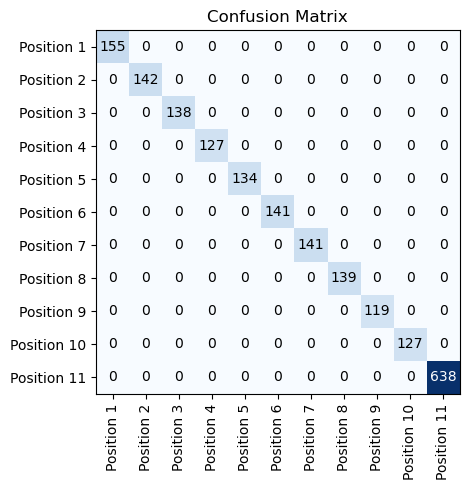

In [28]:
confusion_plot(y_train,training_pred,cm)

In [29]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       142
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       141
           7       1.00      1.00      1.00       141
           8       1.00      1.00      1.00       139
           9       1.00      1.00      1.00       119
          10       1.00      1.00      1.00       127
          11       1.00      1.00      1.00       638

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



### Testing

In [30]:
y_pred = rfc.predict(X_test)
y_pred

array([ 6, 11,  3,  4,  3, 11, 11, 11,  1, 10,  4, 11, 10,  1,  3, 11,  4,
        4, 11,  4,  7, 10,  6,  4, 11, 11, 10,  8, 11, 11,  2,  1, 11,  5,
       11,  2,  4, 11,  8,  5,  3, 11,  5,  2, 11,  8,  4,  1,  6,  4, 10,
        5,  4,  3,  2, 11, 11, 11,  9,  6, 11, 11,  5,  7,  1,  6,  2,  4,
        7,  5,  2, 11,  7,  7,  7, 11, 11,  4, 11,  9, 11,  9,  5, 11,  8,
       11,  4, 11,  9,  3, 11,  9,  5,  5,  4,  6,  1,  1,  9,  5,  1,  2,
       11,  4,  1,  7,  4,  4,  8,  5,  1,  4, 11,  9,  7,  8, 11,  2,  3,
       11, 11,  3, 11,  5,  1,  1,  5, 11, 11,  8,  4, 11, 11, 11,  8, 11,
        3,  1, 10,  4,  3, 11,  1,  4, 11,  9,  5,  2, 11,  3, 11,  5,  8,
        4,  7,  1, 11, 11,  3, 11,  6,  8, 11,  3,  7, 11, 11,  7,  5,  4,
       11, 10,  6,  7, 11,  9,  5, 11, 11,  9,  4,  1,  8,  1,  2,  5,  6,
        1, 11,  8, 11,  4,  9, 11,  7,  3,  7,  5, 11, 10,  9,  6,  3,  1,
        5, 11, 11, 11, 11, 11, 11, 11,  2,  2,  4,  1,  7,  2,  8, 11, 11,
        7, 11,  5,  7, 11

In [31]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  0.9970014992503748


In [32]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  44,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  55,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  42,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  51,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  44,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 210]],
      dtype=int64)

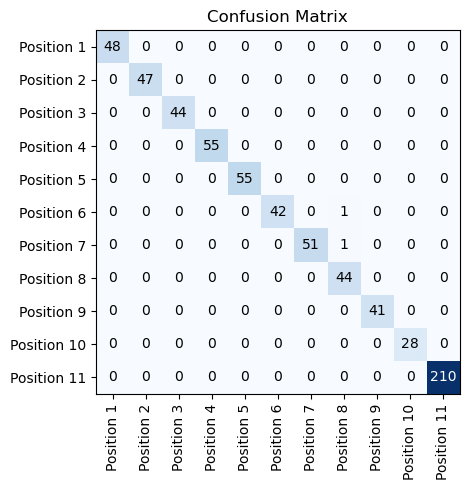

In [33]:
confusion_plot(y_test,y_pred,cm)

In [34]:
report = classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        55
           6       1.00      0.98      0.99        43
           7       1.00      0.98      0.99        52
           8       0.96      1.00      0.98        44
           9       1.00      1.00      1.00        41
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00       210

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



# <u>XGBoost Classifier</u>

In [35]:
y_train = y_train - 1
y_test  = y_test - 1

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    objective="multi:softprob",
    num_class=21,
    random_state=25,
    eval_metric="mlogloss"
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=21, ...)

### Training

In [37]:
training_pred = xgb.predict(X_train)
training_pred

array([10,  7,  0, ...,  5, 10, 10], dtype=int64)

In [38]:
accuracy = accuracy_score(y_train,training_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  1.0


In [39]:
cm = confusion_matrix(y_train,training_pred)
cm 

array([[155,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 138,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 134,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 141,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 141,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 139,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 119,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 638]],
      dtype=int64)

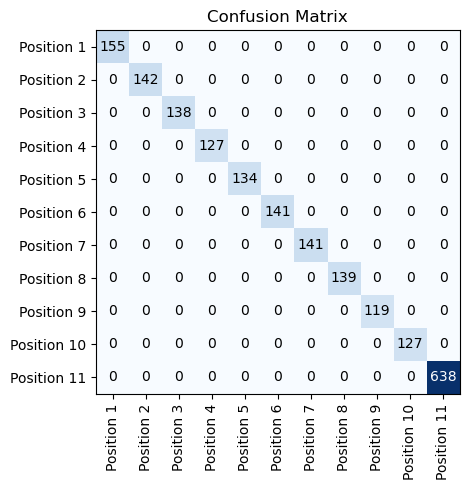

In [40]:
confusion_plot(y_train,training_pred,cm)

In [41]:
report = classification_report(y_train,training_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       141
           6       1.00      1.00      1.00       141
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00       119
           9       1.00      1.00      1.00       127
          10       1.00      1.00      1.00       638

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001



### Testing

In [42]:
y_pred = xgb.predict(X_test)
y_pred

array([ 5, 10,  2,  3,  2, 10, 10, 10,  0,  9,  3, 10,  9,  0,  2, 10,  3,
        3, 10,  3,  6,  9,  5,  3, 10, 10,  9,  7, 10, 10,  1,  0, 10,  4,
       10,  1,  3, 10,  7,  4,  2, 10,  4,  1, 10,  7,  3,  0,  5,  3,  9,
        4,  3,  2,  1, 10, 10, 10,  8,  5, 10, 10,  4,  6,  0,  5,  1,  3,
        6,  4,  1, 10,  6,  6,  6, 10, 10,  3, 10,  8, 10,  8,  4, 10,  7,
       10,  3, 10,  8,  2, 10,  8,  4,  4,  3,  5,  0,  0,  8,  4,  0,  1,
       10,  3,  0,  6,  3,  3,  7,  4,  0,  3, 10,  8,  6,  7, 10,  1,  2,
       10, 10,  2, 10,  4,  0,  0,  4, 10, 10,  7,  3, 10, 10, 10,  7, 10,
        2,  0,  9,  3,  2, 10,  0,  3, 10,  8,  4,  1, 10,  2, 10,  4,  7,
        3,  6,  0, 10, 10,  2, 10,  5,  7, 10,  2,  6, 10, 10,  6,  4,  3,
       10,  9,  5,  6, 10,  8,  4, 10, 10,  8,  3,  0,  7,  0,  1,  4,  5,
        0, 10,  7, 10,  3,  8, 10,  6,  2,  6,  4, 10,  9,  8,  5,  2,  0,
        4, 10, 10, 10, 10, 10, 10, 10,  1,  1,  3,  0,  6,  1,  7, 10, 10,
        6, 10,  4,  6, 10

In [43]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy)

Accuracy Score:  0.9970014992503748


In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  44,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  55,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,  42,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,  51,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  44,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 210]],
      dtype=int64)

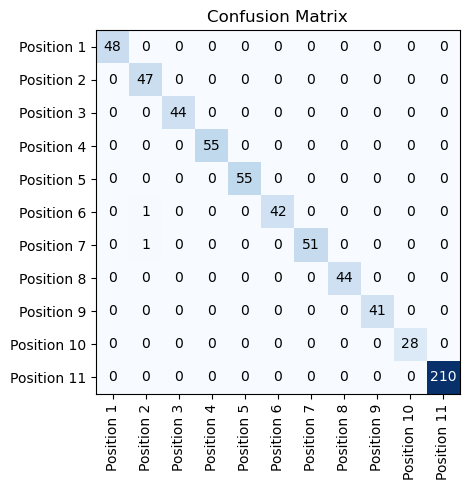

In [45]:
confusion_plot(y_test,y_pred,cm)

In [46]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        55
           5       1.00      0.98      0.99        43
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00       210

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667



In [47]:
df.columns

Index(['Pos.', 'No.', 'Laps', 'Pts.', 'Time_seconds', 'Driver_code',
       'Country_code', 'Team_code', 'Pos_class'],
      dtype='object')